In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Oil and Gas Production and Emissions Data on the Norwegian Continental Shelf

## Part 3: Data Processing

---

This notebook is part of a series of notebooks. The series consist of other following parts:

#### Part 1: [Data Collection](https://github.com/percw/Norwegian_oil_gas_decarbonization/blob/main/notebooks/01_data_building/01_production_and_emission_data_building.ipynb)

#### Part 2: [Data Cleaning](https://github.com/percw/Norwegian_oil_gas_decarbonization/blob/main/notebooks/02_data_cleaning/02_production_and_emission_data_cleaning.ipynb)

---


This notebook aims to process the cleaned data from the previous notebook. It's based on the main dataframe called `fields_prod_emissions_1997_2023.csv`. The data will be processed to create statistics and visualizations that will help to understand the emissions, production and carbon intensity of Norwegian Oil and Gas production better. The dataframe contains over 60 different columns. A description follows.


### Table of Contents

1. [Data Loading](#data_loading)
2. [Data Description](#data_description)
3. [Data Analysis](#data_analysis)
4. [Data Processing](#data_processing)
5. [Data Visualization](#data_visualization)


### Data Loading


In [23]:
# Importing the dataset from the csv file

url_path = 'https://raw.githubusercontent.com/percw/Norwegian_oil_gas_decarbonization/main/'
filename = '/data/output/emissions_and_production/cleaned/fields_prod_emissions_1997_2023.csv'

# Creating a check if import is successful
try:
	fields_prod_emissions_1997_2023_df = pd.read_csv(''.join([url_path, filename]))
	print('Data import successful')
except:
	print('Data import failed')
 

Data import successful


In [11]:
fields_prod_emissions_1997_2023_df.info()
fields_prod_emissions_1997_2023_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 78 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   field                                       1803 non-null   object 
 1   year                                        1803 non-null   int64  
 2   net_oil_prod_yearly_mill_sm3                1803 non-null   float64
 3   net_gas_prod_yearly_bill_sm3                1803 non-null   float64
 4   net_ngl_prod_yearly_mill_sm3                1803 non-null   float64
 5   net_condensate_prod_yearly_mill_sm3         1803 non-null   float64
 6   net_oil_eq_prod_yearly_mill_sm3             1803 non-null   float64
 7   produced_water_yearly_mill_sm3              1803 non-null   float64
 8   field_id                                    1803 non-null   int64  
 9   net_oil_prod_monthly_sm3_volatility         1803 non-null   float64
 10  net_gas_prod

,field,year,net_oil_prod_yearly_mill_sm3,net_gas_prod_yearly_bill_sm3,net_ngl_prod_yearly_mill_sm3,net_condensate_prod_yearly_mill_sm3,net_oil_eq_prod_yearly_mill_sm3,produced_water_yearly_mill_sm3,field_id,net_oil_prod_monthly_sm3_volatility,net_gas_prod_monthly_sm3_volatility,net_ngl_prod_monthly_sm3_volatility,net_condensate_prod_monthly_sm3_volatility,net_oil_eq_prod_monthly_sm3_volatility,produced_water_in_field_volatility,status,current_status,field_owner,processing_field,field_in_emissions,facilities_lifetime_mean,facilities_lifetime_std,facilities_water_depth_mean,facilities_water_depth_std,subsea_facilites_shut_down,surface_facilites_shut_down,subsea_facilites_in_service,surface_facilites_in_service,facility_kind_multi well template,facility_kind_single well template,facility_kind_offshore wind turbine,facility_kind_subsea structure,facility_kind_fpso,facility_kind_jacket 8 legs,facility_kind_condeep monoshaft,facility_kind_loading system,facility_kind_jacket 4 legs,facility_kind_jacket tripod,facility_kind_fsu,facility_kind_semisub steel,facility_kind_condeep 4 shafts,facility_kind_landfall,facility_kind_tlp concrete,facility_kind_jack-up 3 legs,facility_kind_jacket 6 legs,facility_kind_tlp steel,facility_kind_semisub concrete,facility_kind_mopustor,facility_kind_spar,well_status_closed,well_status_drilling,well_status_injecting,well_status_junked,well_status_online/operational,well_status_p&a,well_status_plugged,well_status_producing,well_status_suspended,well_purpose_injection,well_purpose_observation,well_purpose_production,well_subsea_no,well_subsea_yes,well_final_vertical_depth_mean,well_final_vertical_depth_std,well_water_depth_mean,well_water_depth_std,investments_mill_nok,future_investments_mill_nok,yearly_co2_emissions_1000_tonnes,org_number,operator,yearly_ch4_emissions_tons,yearly_nox_emissions_tons,yearly_oil_spill_emissions_tons,yearly_water_emissions_m3,ownership_original,ownership_new_name
0,statfjord nord,1997,3.93531,0.17288,0.09230,0.00000,4.20051,0.0,43679,0.053898,0.000405,0.000334,0.000000,0.054005,0.0,Producing,Producing,21084.0,statfjord,True,27.5,15.0,241.75,65.030121,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,9.0,0.0,4.0,0.0,13.0,0.0,17.0,2888.8,0.000000,285.0,0.000000,255.0,2946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'Den norske stats oljeselskap a.s': 50.0, 'Mo...","{'Equinor ASA': 1.875, 'Mobil Development Norw..."
1,veslefrikk,1997,3.47468,0.13919,0.08596,0.00000,3.69981,0.0,43618,0.052851,0.008952,0.005461,0.000000,0.053418,0.0,Producing,Shut down,21212.0,veslefrikk,True,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111.0,0.0,0.0,69.0,6.0,36.0,111.0,0.0,3317.0,0.000000,175.0,0.000000,229.0,0.0,156.20492,993246905.0,equinor energy as,64.319881,973.4661,88.599389,2782760.0,"{'Den norske stats oljeselskap a.s': 55.0, 'To...","{'Equinor ASA': 55.0, 'TotalEnergies EP Norge'..."
2,frøy,1997,1.39602,0.28878,0.00000,0.01732,1.70211,0.0,43597,0.026260,0.005287,0.000000,0.000942,0.030860,0.0,Producing,Shut down,3810636.0,frigg,False,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,6.0,0.0,6.0,12.0,0.0,3352.2,70.481913,120.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'Den norske stats oljeselskap a.s': 53.96, 'T...","{'Equinor ASA': 53.96, 'TotalEnergies EP Norge..."
3,hod,1997,0.46766,0.09469,0.02645,0.00000,0.58879,0.0,43485,0.003632,0.001044,0.000238,0.000000,0.004729,0.0,Producing,Producing,21052.0,valhall,True,30.0,0.0,72.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,6.0,30.0,36.0,0.0,2917.5,159.099026,72.0,0.000000,3.0,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'Enterprise Oil Norwegian AS': 25.0, 'Elf Pet...","{'Shell

### Data Description


#### Field Information

| Field              | Description                     | Unit | Note |
| ------------------ | ------------------------------- | ---- | ---- |
| field              | Name of the field               | -    | -    |
| year               | Year of data                    | -    | -    |
| field_id           | Unique identifier for the field | -    | -    |
| status             | Status of the field             | -    | -    |
| current_status     | Current status of the field     | -    | -    |
| field_owner        | Owner of the field              | -    | -    |
| processing_field   | Processing field                | -    | -    |
| field_in_emissions | Field emissions status          | -    | -    |

#### Production Data

| Field                               | Description                          | Unit                                | Note |
| ----------------------------------- | ------------------------------------ | ----------------------------------- | ---- |
| net_oil_prod_yearly_mill_sm3        | Net oil production yearly            | million standard cubic meters (sm3) | -    |
| net_gas_prod_yearly_bill_sm3        | Net gas production yearly            | billion standard cubic meters (sm3) | -    |
| net_ngl_prod_yearly_mill_sm3        | Net NGL production yearly            | million standard cubic meters (sm3) | -    |
| net_condensate_prod_yearly_mill_sm3 | Net condensate production yearly     | million standard cubic meters (sm3) | -    |
| net_oil_eq_prod_yearly_mill_sm3     | Net oil equivalent production yearly | million standard cubic meters (sm3) | -    |
| produced_water_yearly_mill_sm3      | Produced water yearly                | million standard cubic meters (sm3) | -    |

#### Production Volatility

| Field                                      | Description                                      | Unit                        | Note |
| ------------------------------------------ | ------------------------------------------------ | --------------------------- | ---- |
| net_oil_prod_monthly_sm3_volatility        | Net oil production monthly volatility            | standard cubic meters (sm3) | -    |
| net_gas_prod_monthly_sm3_volatility        | Net gas production monthly volatility            | standard cubic meters (sm3) | -    |
| net_ngl_prod_monthly_sm3_volatility        | Net NGL production monthly volatility            | standard cubic meters (sm3) | -    |
| net_condensate_prod_monthly_sm3_volatility | Net condensate production monthly volatility     | standard cubic meters (sm3) | -    |
| net_oil_eq_prod_monthly_sm3_volatility     | Net oil equivalent production monthly volatility | standard cubic meters (sm3) | -    |
| produced_water_in_field_volatility         | Produced water in field volatility               | -                           | -    |

#### Facilities Information

| Field                       | Description                                  | Unit   | Note |
| --------------------------- | -------------------------------------------- | ------ | ---- |
| facilities_lifetime_mean    | Mean lifetime of facilities                  | years  | -    |
| facilities_lifetime_std     | Standard deviation of facilities lifetime    | years  | -    |
| facilities_water_depth_mean | Mean water depth of facilities               | meters | -    |
| facilities_water_depth_std  | Standard deviation of facilities water depth | meters | -    |

#### Facilities Status

| Field                        | Description                             | Unit    | Note |
| ---------------------------- | --------------------------------------- | ------- | ---- |
| subsea_facilites_shut_down   | Number of subsea facilities shut down   | numeric | -    |
| surface_facilites_shut_down  | Number of surface facilities shut down  | numeric | -    |
| subsea_facilites_in_service  | Number of subsea facilities in service  | numeric | -    |
| surface_facilites_in_service | Number of surface facilities in service | numeric | -    |

#### Facility Types

| Field                               | Description                          | Unit    | Note |
| ----------------------------------- | ------------------------------------ | ------- | ---- |
| facility_kind_multi well template   | Facility type: multi well template   | numeric | -    |
| facility_kind_single well template  | Facility type: single well template  | numeric | -    |
| facility_kind_offshore wind turbine | Facility type: offshore wind turbine | numeric | -    |
| facility_kind_subsea structure      | Facility type: subsea structure      | numeric | -    |
| facility_kind_fpso                  | Facility type: FPSO                  | numeric | -    |
| facility_kind_jacket 8 legs         | Facility type: jacket with 8 legs    | numeric | -    |
| facility_kind_condeep monoshaft     | Facility type: condeep monoshaft     | numeric | -    |
| facility_kind_loading system        | Facility type: loading system        | numeric | -    |
| facility_kind_jacket 4 legs         | Facility type: jacket with 4 legs    | numeric | -    |
| facility_kind_jacket tripod         | Facility type: jacket tripod         | numeric | -    |
| facility_kind_fsu                   | Facility type: FSU                   | numeric | -    |
| facility_kind_semisub steel         | Facility type: semisub steel         | numeric | -    |
| facility_kind_condeep 4 shafts      | Facility type: condeep with 4 shafts | numeric | -    |
| facility_kind_landfall              | Facility type: landfall              | numeric | -    |
| facility_kind_tlp concrete          | Facility type: TLP concrete          | numeric | -    |
| facility_kind_jack-up 3 legs        | Facility type: jack-up with 3 legs   | numeric | -    |
| facility_kind_jacket 6 legs         | Facility type: jacket with 6 legs    | numeric | -    |
| facility_kind_tlp steel             | Facility type: TLP steel             | numeric | -    |
| facility_kind_semisub concrete      | Facility type: semisub concrete      | numeric | -    |
| facility_kind_mopustor              | Facility type: mopustor              | numeric | -    |
| facility_kind_spar                  | Facility type: spar                  | numeric | -    |

#### Well Status

| Field                          | Description                              | Unit    | Note                     |
| ------------------------------ | ---------------------------------------- | ------- | ------------------------ |
| well_status_closed             | Well status: closed                      | numeric | total accumulated yearly |
| well_status_drilling           | Well status: drilling                    | numeric | total accumulated yearly |
| well_status_injecting          | Well status: injecting                   | numeric | total accumulated yearly |
| well_status_junked             | Well status: junked                      | numeric | total accumulated yearly |
| well_status_online/operational | Well status: online/operational          | numeric | total accumulated yearly |
| well_status_p&a                | Well status: P&A (plugged and abandoned) | numeric | total accumulated yearly |
| well_status_plugged            | Well status: plugged                     | numeric | total accumulated yearly |
| well_status_producing          | Well status: producing                   | numeric | total accumulated yearly |
| well_status_suspended          | Well status: suspended                   | numeric | total accumulated yearly |

#### Well Purpose

| Field                    | Description               | Unit    | Note |
| ------------------------ | ------------------------- | ------- | ---- |
| well_purpose_injection   | Well purpose: injection   | numeric | -    |
| well_purpose_observation | Well purpose: observation | numeric | -    |
| well_purpose_production  | Well purpose: production  | numeric | -    |

#### Well Information

| Field                          | Description                                         | Unit    | Note                         |
| ------------------------------ | --------------------------------------------------- | ------- | ---------------------------- |
| well_subsea_no                 | Well subsea: no                                     | boolean |                              |
| well_subsea_yes                | Well subsea: yes                                    | boolean |                              |
| well_final_vertical_depth_mean | Mean final vertical depth of wells                  | meters  | average for field            |
| well_final_vertical_depth_std  | Standard deviation of final vertical depth of wells | meters  | standard deviation for field |
| well_water_depth_mean          | Mean water depth of wells                           | meters  | average for field            |
| well_water_depth_std           | Standard deviation of water depth of wells          | meters  | standard deviation for field |

#### Financial and Environmental Data

| Field                            | Description                | Unit              | Note |
| -------------------------------- | -------------------------- | ----------------- | ---- |
| investments_mill_nok             | Investments                | million NOK       | -    |
| future_investments_mill_nok      | Future investments         | million NOK       | -    |
| yearly_co2_emissions_1000_tonnes | Yearly CO2 emissions       | 1000 tonnes       | -    |
| yearly_ch4_emissions_tons        | Yearly CH4 emissions       | tons              | -    |
| yearly_nox_emissions_tons        | Yearly NOx emissions       | tons              | -    |
| yearly_oil_spill_emissions_tons  | Yearly oil spill emissions | tons              | -    |
| yearly_water_emissions_m3        | Yearly water emissions     | cubic meters (m3) | -    |
| org_number                       | Organization number        | numeric           | -    |
| operator                         | Operator of the field      | numeric           | -    |


### Data Processing


For some fields, we need to estimate the emissions based on production. This is due to the fact that some facilites transport their production directly and hence do not have emissions.


In [21]:
# Fields where emissions in NaN

fields_nan_emissions = fields_prod_emissions_1997_2023_df[fields_prod_emissions_1997_2023_df['yearly_co2_emissions_1000_tonnes'].isna()]['field'].unique()
fields_nan_emissions

array(['statfjord nord', 'frøy', 'hod', 'albuskjell', 'cod', 'edda',
       'lille-frigg', 'frigg', 'murchison', 'statfjord øst', 'øst frigg',
       'gungne', 'embla', 'tommeliten gamma', 'sleipner vest',
       'sleipner øst', 'vest ekofisk', 'gullfaks sør', 'vigdis', 'tordis',
       'sygna', 'tambar', 'vale', 'fram', 'skirne', 'sigyn', 'mikkel',
       'gimle', 'tune', 'ringhorne øst', 'snøhvit', 'blane', 'enoch',
       'volund', 'vilje', 'urd', 'rev', 'yttergryta', 'vega',
       'visund sør', 'alve', 'islay', 'gaupe', 'trym', 'jette', 'marulk',
       'hyme', 'oselvar', 'atla', 'fram h-nord', 'morvin', 'svalin',
       'ormen lange', 'brynhild', 'bøyla', 'sindre', 'volve', 'flyndre',
       'byrding', 'huldra', 'skuld', 'oda', 'trestakk', 'utgard', 'njord',
       'skogul', 'dvalin', 'duva', 'ærfugl nord', 'bauge', 'nova',
       'breidablikk', 'veslefrikk', 'solveig', 'fenja', 'tommeliten a'],
      dtype=object)

In [ ]:
# For each processing plant, we will calculate the total production with its corresponding sub fields
# Production columns: 
# 			net_oil_prod_yearly_mill_sm3
# 			net_gas_prod_yearly_bill_sm3
# 			net_ngl_prod_yearly_mill_sm3
# 			net_condensate_prod_yearly_mill_sm3
# 			net_oil_eq_prod_yearly_mill_sm3
# 			produced_water_yearly_mill_sm3
# 			net_oil_prod_monthly_sm3_volatility
# 			net_gas_prod_monthly_sm3_volatility
# 			net_ngl_prod_monthly_sm3_volatility
# 			net_condensate_prod_monthly_sm3_volatility 
# 			net_oil_eq_prod_monthly_sm3_volatility
# 			produced_water_in_field_volatility





### Data Analysis


year
1997    38
1998    40
1999    39
2000    41
2001    44
2002    44
2003    47
2004    49
2005    51
2006    52
2007    56
2008    60
2009    64
2010    67
2011    68
2012    75
2013    78
2014    82
2015    84
2016    85
2017    88
2018    86
2019    88
2020    90
2021    93
2022    96
2023    98
Name: field, dtype: int64

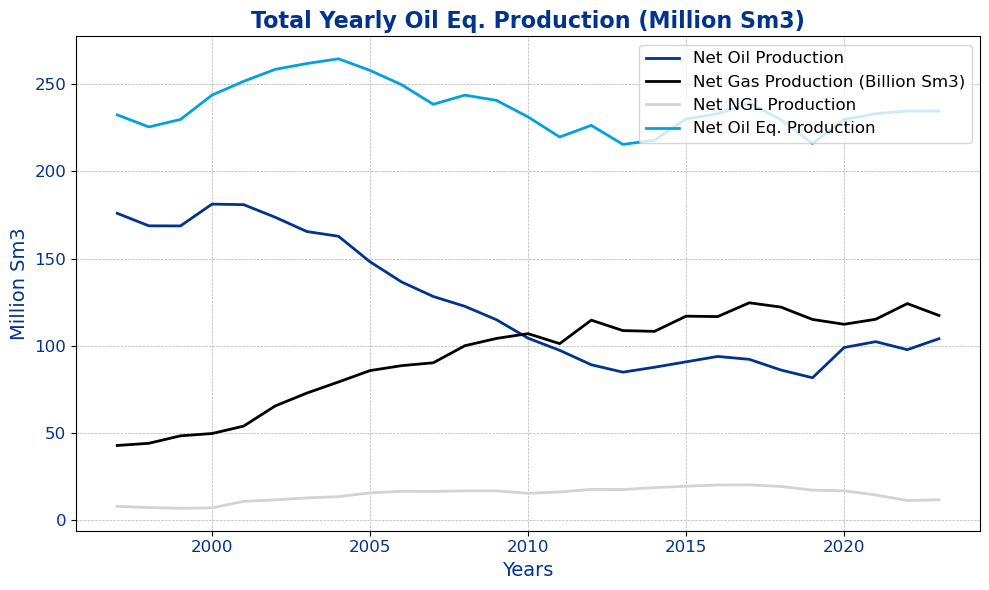

In [12]:

# Plot
plt.figure(figsize=(10, 6))

# Setting x as the average production across fields
net_oil_prod_x = fields_prod_emissions_1997_2023_df.groupby('year')['net_oil_prod_yearly_mill_sm3'].sum().index
net_oil_prod_y = fields_prod_emissions_1997_2023_df.groupby('year')['net_oil_prod_yearly_mill_sm3'].sum().values

net_gas_prod_x = fields_prod_emissions_1997_2023_df.groupby('year')['net_gas_prod_yearly_bill_sm3'].sum().index
net_gas_prod_y = fields_prod_emissions_1997_2023_df.groupby('year')['net_gas_prod_yearly_bill_sm3'].sum().values

net_ngl_prod_x = fields_prod_emissions_1997_2023_df.groupby('year')['net_ngl_prod_yearly_mill_sm3'].sum().index
net_ngl_prod_y = fields_prod_emissions_1997_2023_df.groupby('year')['net_ngl_prod_yearly_mill_sm3'].sum().values

net_oil_eq_x = fields_prod_emissions_1997_2023_df.groupby('year')['net_oil_eq_prod_yearly_mill_sm3'].sum().index
net_oil_eq_y = fields_prod_emissions_1997_2023_df.groupby('year')['net_oil_eq_prod_yearly_mill_sm3'].sum().values


plt.plot(net_oil_prod_x, net_oil_prod_y, color='#00338D', linewidth=2) # Dark blue
plt.plot(net_gas_prod_x, net_gas_prod_y, color='#000000', linewidth=2) # Black
plt.plot(net_ngl_prod_x, net_ngl_prod_y, color='#D3D3D3', linewidth=2) # Light gray
plt.plot(net_oil_eq_x, net_oil_eq_y, color='#00A1DE', linewidth=2) # Light blue

# Titles and labels
plt.title('Total Yearly Oil Eq. Production (Million Sm3)', fontsize=16, fontweight='bold', color='#00338D')
plt.xlabel('Years', fontsize=14, color='#00338D')
plt.ylabel('Million Sm3', fontsize=14, color='#00338D')

# Customizing ticks
plt.xticks(fontsize=12, color='#00338D')
plt.yticks(fontsize=12, color='#00338D')

# Legend
plt.legend(['Net Oil Production', 'Net Gas Production (Billion Sm3)', 'Net NGL Production', 'Net Oil Eq. Production'], loc='upper right', fontsize=12)

# Grid and layout
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()

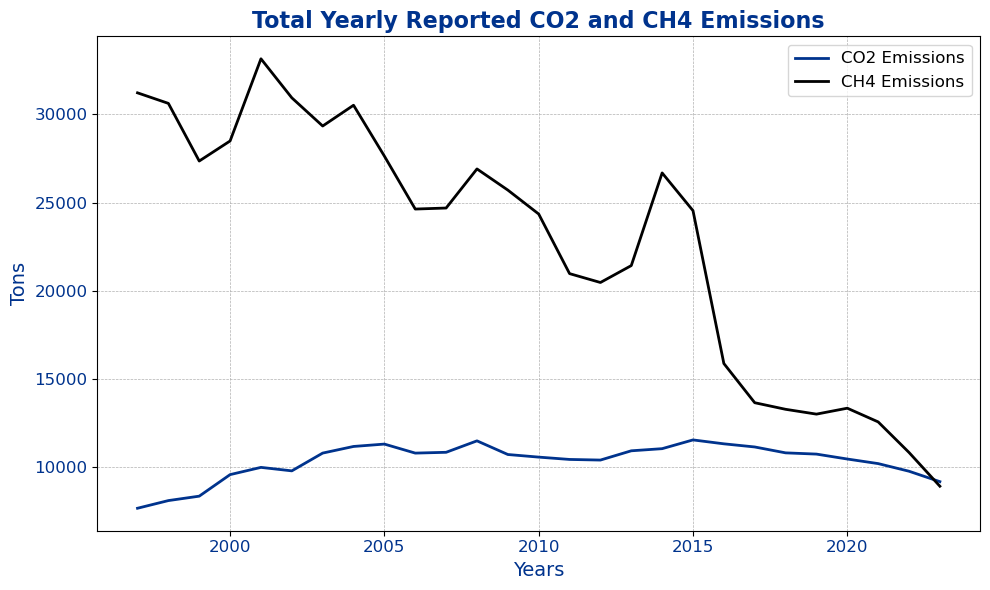

In [13]:
# Plotting the emissions for co2 and ch4

plt.figure(figsize=(10, 6))

# Setting x as the average production across fields
co2_x = fields_prod_emissions_1997_2023_df.groupby('year')['yearly_co2_emissions_1000_tonnes'].sum().index
co2_y = fields_prod_emissions_1997_2023_df.groupby('year')['yearly_co2_emissions_1000_tonnes'].sum().values

ch4_x = fields_prod_emissions_1997_2023_df.groupby('year')['yearly_ch4_emissions_tons'].sum().index
ch4_y = fields_prod_emissions_1997_2023_df.groupby('year')['yearly_ch4_emissions_tons'].sum().values

# Multiplying the ch4 emissions by 25 to get the equivalent in CO2 emissions
#ch4_x = ch4_x * 25

plt.plot(co2_x, co2_y, color='#00338D', linewidth=2) # Red
plt.plot(ch4_x, ch4_y, color='#000000', linewidth=2) # Green

# Titles and labels
plt.title('Total Yearly Reported CO2 and CH4 Emissions', fontsize=16, fontweight='bold', color='#00338D')
plt.xlabel('Years', fontsize=14, color='#00338D')
plt.ylabel('Tons', fontsize=14, color='#00338D')

# Customizing ticks
plt.xticks(fontsize=12, color='#00338D')
plt.yticks(fontsize=12, color='#00338D')


# Legend
plt.legend(['CO2 Emissions', 'CH4 Emissions'], loc='upper right', fontsize=12)

# Grid and layout
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# Plotting the CO2 emissions for each field over the years

# Top 20 CO2 polluting fields over the years

top_20_co2_polluting_fields = emissions_df.groupby('field')['yearly_co2_emissions_1000_tonnes'].sum().sort_values(ascending=False).head(20).index
top_10_co2_polluting_fields = emissions_df.groupby('field')['yearly_co2_emissions_1000_tonnes'].sum().sort_values(ascending=False).head(10).index
bottom_10_co2_polluting_fields = emissions_df.groupby('field')['yearly_co2_emissions_1000_tonnes'].sum().sort_values(ascending=True).head(10).index
bottom_20_co2_polluting_fields = emissions_df.groupby('field')['yearly_co2_emissions_1000_tonnes'].sum().sort_values(ascending=True).head(20).index
bottom_30_co2_polluting_fields = emissions_df.groupby('field')['yearly_co2_emissions_1000_tonnes'].sum().sort_values(ascending=True).head(30).index


### Data Visualization
